## Intro to Data Visualization with Python

#### Content 
1. Price histogram
2. Days of the week bar graph
3. Days of the week line graph
4. Orders hours of the day histogram
5. Orders hours of the day line graph
6. Age vs spendings scatter plot

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing customers data set
df_cust=pd.read_pickle(r'C:\Users\kirat\Documents\Career Foundy\Python\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers.pkl')

In [5]:
df_cust.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7819460 entries, 0 to 7819459
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  _merge                  object 
 11  product_name            object 
 12  aisle_id                int64  
 13  department_id           int64  
 14  prices                  float64
 15  price_range_loc         object 
 16  busiest_day             object 
 17  busiest_days            object 
 18  busiest_period_of_day   object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  mean_spend              float64

In [8]:
df_cust.loc[df_cust['prices']>100, 'prices'] = np.nan

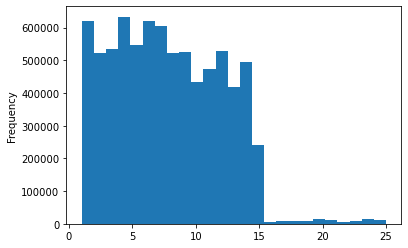

In [9]:
#histogram of prices
hist=df_cust['prices'].plot.hist(bins=25)

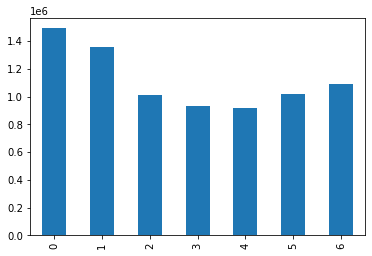

In [10]:
#bar graph for the day of the week
df_cust['order_dow'].value_counts().sort_index().plot.bar()

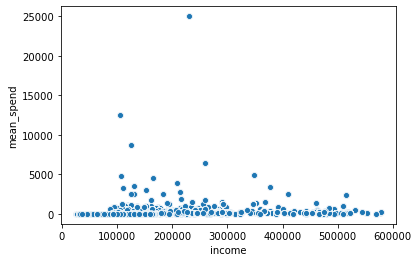

In [11]:
#scatterplot for income verses mean amount spend
sns.scatterplot(x='income', y='mean_spend', data=df_cust)

In [13]:
np.random.seed(4)

In [14]:
dev=np.random.rand(len(df_cust)) <= 0.7

In [15]:
big = df_cust[dev]

In [16]:
small = df_cust[~dev]

In [17]:
len(df_cust)

7819460

In [18]:
len(big)+len(small)

7819460

In [19]:
df_2 = small[['order_dow', 'prices']]

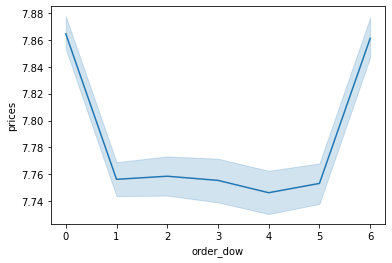

In [30]:
#lineplot for the price in terms of days of the week
line_dow = sns.lineplot(data=df_2, x='order_dow', y='prices')

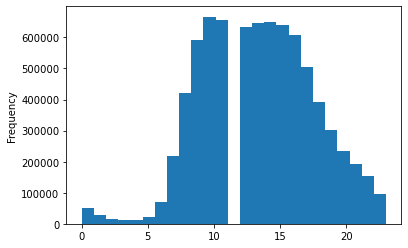

In [21]:
#histogram for the number of orders in a 24 hour period
hist=df_cust['order_hour_of_day'].plot.hist(bins=25)

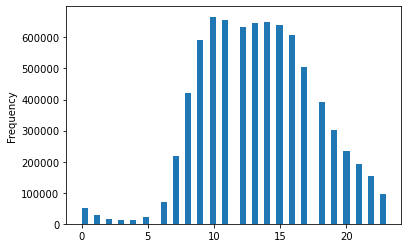

In [22]:
hist=df_cust['order_hour_of_day'].plot.hist(bins=50)

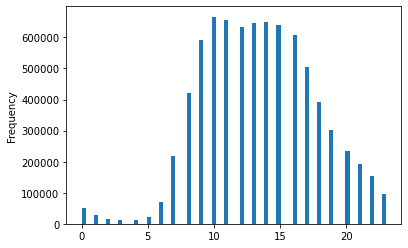

In [31]:
hist_hod=df_cust['order_hour_of_day'].plot.hist(bins=75)

Almost no orders are made between midnight and 6am. The peak ordering hours are 9am-5pm.

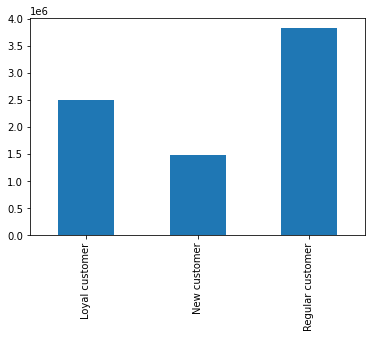

In [32]:
#count of customers in the loyalty category
bar_lf=df_cust['loyalty_flag'].value_counts().sort_index().plot.bar()

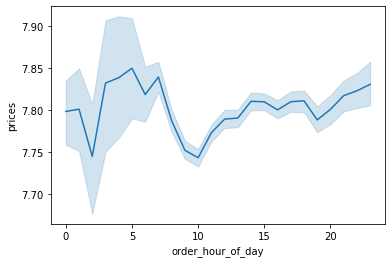

In [33]:
#lineplot for orders during a 24 hour period verses the price
line_hod = sns.lineplot(data=df_cust, x='order_hour_of_day', y='prices')

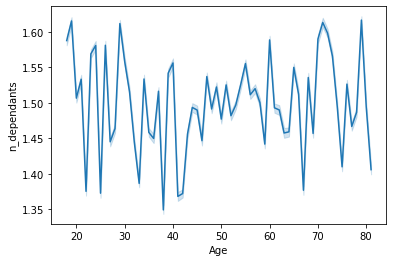

In [34]:
#lineplot for the number of dependants in terms of age
line_age = sns.lineplot(data=df_cust, x='Age', y='n_dependants')

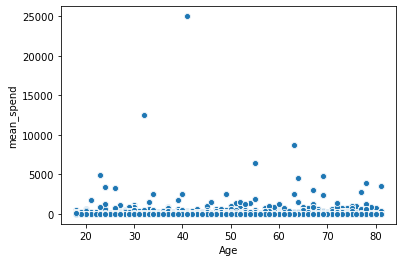

In [35]:
#Scatterplot of age verses mean amount spend. The data appear to have outliers. This might be because of the mistake in price
plot_age = sns.scatterplot(x='Age', y='mean_spend', data=df_cust)

In [29]:
#exporting visualizations
path = r'C:\Users\kirat\Documents\Career Foundy\Python\Instacart Basket Analysis'

In [37]:
line_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visializations','line_dow.png'))

In [38]:
hist_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visializations', 'hist_hod.png'))

In [39]:
bar_lf.figure.savefig(os.path.join(path, '04 Analysis', 'Visializations','bar_lf.png'))

In [40]:
line_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visializations','line_hod'))

In [41]:
line_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visializations','line_age'))

In [42]:
plot_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visializations','plot_age'))